In [15]:
import math
import random
import time
import heapq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# a) Dijkstra's using an adjacency matrix and arrays

In [16]:
def dijkMatrix(graph, start):
    V = len(graph)
    dist = [math.inf] * V
    visited = [False] * V
    dist[start] = 0
    for i in range(V):
        u = -1
        min_dist = math.inf
        for v in range(V):
            if not visited[v] and dist[v] < min_dist:
                min_dist = dist[v]
                u = v
        if u == -1:
            break
        visited[u] = True
        for v in range(V):
            if graph[u][v] != math.inf and not visited[v]:
                if dist[u] + graph[u][v] < dist[v]:
                    dist[v] = dist[u] + graph[u][v]
    return dist

a) benchmarking

Running Dijkstra (Adjacency Matrix) Benchmarks...


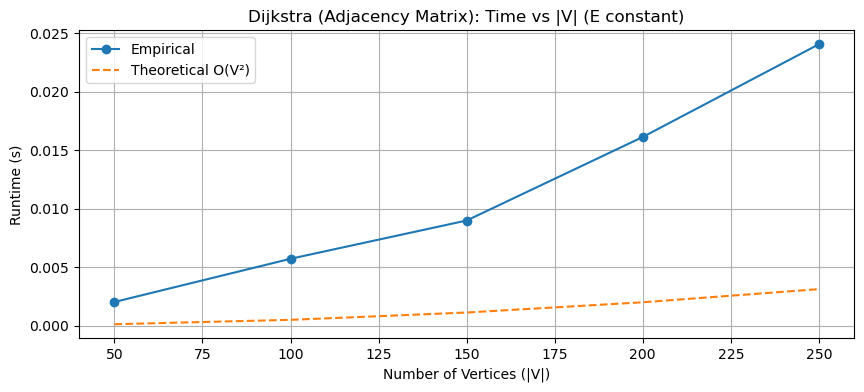

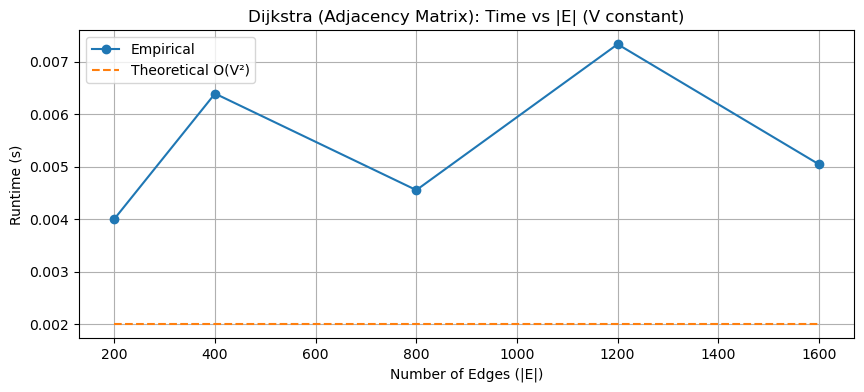

In [17]:
def generate_graph(V, E):
    """Generate a random undirected weighted graph with V vertices and E edges."""
    matrix = [[0]*V for _ in range(V)]
    adj_list = [[] for _ in range(V)]
    edges = set()

    while len(edges) < E:
        u = random.randint(0, V-1)
        v = random.randint(0, V-1)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            w = random.randint(1, 10)
            matrix[u][v] = matrix[v][u] = w
            adj_list[u].append((v, w))
            adj_list[v].append((u, w))
            edges.add((u, v))

    return matrix, adj_list



def benchmark_matrix():
    print("Running Dijkstra (Adjacency Matrix) Benchmarks...")
    
    E = 300  
    vertex_counts = [50, 100, 150, 200, 250]
    times = []

    for V in vertex_counts:
        matrix, _ = generate_graph(V, E if E < V*(V-1)//2 else V*(V-1)//2)
        start = time.time()
        dijkMatrix(matrix, 0)
        times.append(time.time() - start)

    # Theoretical: O(V^2)
    theory = [0.00000005 * (V**2) for V in vertex_counts]

    plt.figure(figsize=(10, 4))
    plt.plot(vertex_counts, times, 'o-', label='Empirical')
    plt.plot(vertex_counts, theory, '--', label='Theoretical O(V²)')
    plt.title("Dijkstra (Adjacency Matrix): Time vs |V| (E constant)")
    plt.xlabel("Number of Vertices (|V|)")
    plt.ylabel("Runtime (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

 
    V = 200  
    edge_counts = [200, 400, 800, 1200, 1600]
    times = []

    for E in edge_counts:
        matrix, _ = generate_graph(V, E)
        start = time.time()
        dijkMatrix(matrix, 0)
        times.append(time.time() - start)

    # Theoretical: O(V^2) -> constant wrt E
    theory = [0.00000005 * (V**2) for _ in edge_counts]

    plt.figure(figsize=(10, 4))
    plt.plot(edge_counts, times, 'o-', label='Empirical')
    plt.plot(edge_counts, theory, '--', label='Theoretical O(V²)')
    plt.title("Dijkstra (Adjacency Matrix): Time vs |E| (V constant)")
    plt.xlabel("Number of Edges (|E|)")
    plt.ylabel("Runtime (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

benchmark_matrix()



# b) Dijkstra's using adjacency lists and heap

In [18]:
def dijkList(graph, start):
    V = len(graph)
    dist = [math.inf] * V
    dist[start] = 0
    pq = [(0, start)]  

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:  
            continue
        for v, w in graph[u]:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                heapq.heappush(pq, (dist[v], v))

    return dist

b) benchmarking

Running Dijkstra (Adjacency List + Heap) Benchmarks...


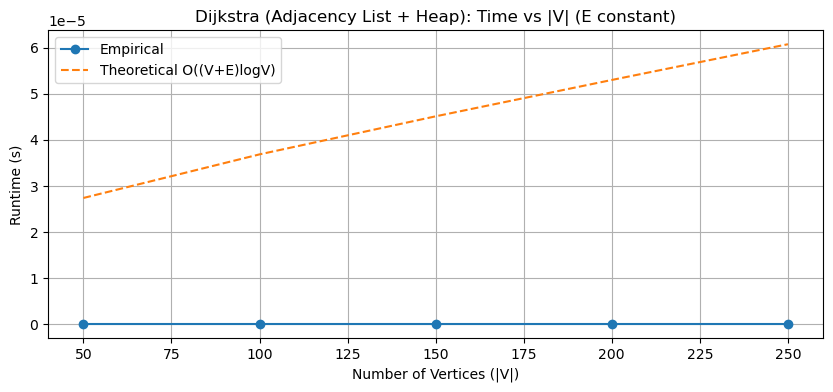

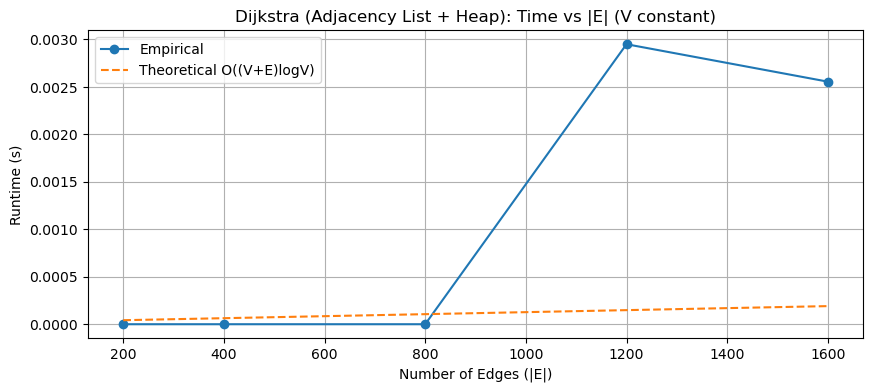

In [19]:
def benchmark_list():
    print("Running Dijkstra (Adjacency List + Heap) Benchmarks...")
 
    E = 300  
    vertex_counts = [50, 100, 150, 200, 250]
    times = []

    for V in vertex_counts:
        _, adj_list = generate_graph(V, E if E < V*(V-1)//2 else V*(V-1)//2)
        start = time.time()
        dijkList(adj_list, 0)
        times.append(time.time() - start)

    # Theoretical: O((V+E)logV)
    theory = [0.00000002 * ((V + E) * math.log(V)) for V in vertex_counts]

    plt.figure(figsize=(10, 4))
    plt.plot(vertex_counts, times, 'o-', label='Empirical')
    plt.plot(vertex_counts, theory, '--', label='Theoretical O((V+E)logV)')
    plt.title("Dijkstra (Adjacency List + Heap): Time vs |V| (E constant)")
    plt.xlabel("Number of Vertices (|V|)")
    plt.ylabel("Runtime (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

    V = 200  
    edge_counts = [200, 400, 800, 1200, 1600]
    times = []

    for E in edge_counts:
        _, adj_list = generate_graph(V, E)
        start = time.time()
        dijkList(adj_list, 0)
        times.append(time.time() - start)

    # Theoretical: O((V+E)logV)
    theory = [0.00000002 * ((V + E) * math.log(V)) for E in edge_counts]

    plt.figure(figsize=(10, 4))
    plt.plot(edge_counts, times, 'o-', label='Empirical')
    plt.plot(edge_counts, theory, '--', label='Theoretical O((V+E)logV)')
    plt.title("Dijkstra (Adjacency List + Heap): Time vs |E| (V constant)")
    plt.xlabel("Number of Edges (|E|)")
    plt.ylabel("Runtime (s)")
    plt.legend()
    plt.grid(True)
    plt.show()


benchmark_list()

# c) comparison of the 2 on both sparse and dense graphs

,Density,Vertices,Matrix+Array (µs),AdjList+Heap (µs),Speedup (MA/AL)
0,1% Edges (Sparse),100,2.570500e+02,12.000004,21.420827
1,1% Edges (Sparse),200,1.074230e+04,180.899980,59.382538
2,1% Edges (Sparse),300,3.163925e+04,413.450005,76.524972
3,1% Edges (Sparse),400,5.434610e+04,673.449977,80.698050
4,1% Edges (Sparse),500,8.527150e+04,978.600030,87.136212
5,1% Edges (Sparse),600,1.228034e+05,1535.350049,79.983975
6,1% Edges (Sparse),700,1.697076e+05,1998.049993,84.936614
7,1% Edges (Sparse),800,2.246414e+05,2781.449992,80.764134
8,1% Edges (Sparse),900,3.539382e+05,4748.699983,74.533694
9,1% Edges (Sparse),1000,3.752216e+05,5015.850009,74.807191


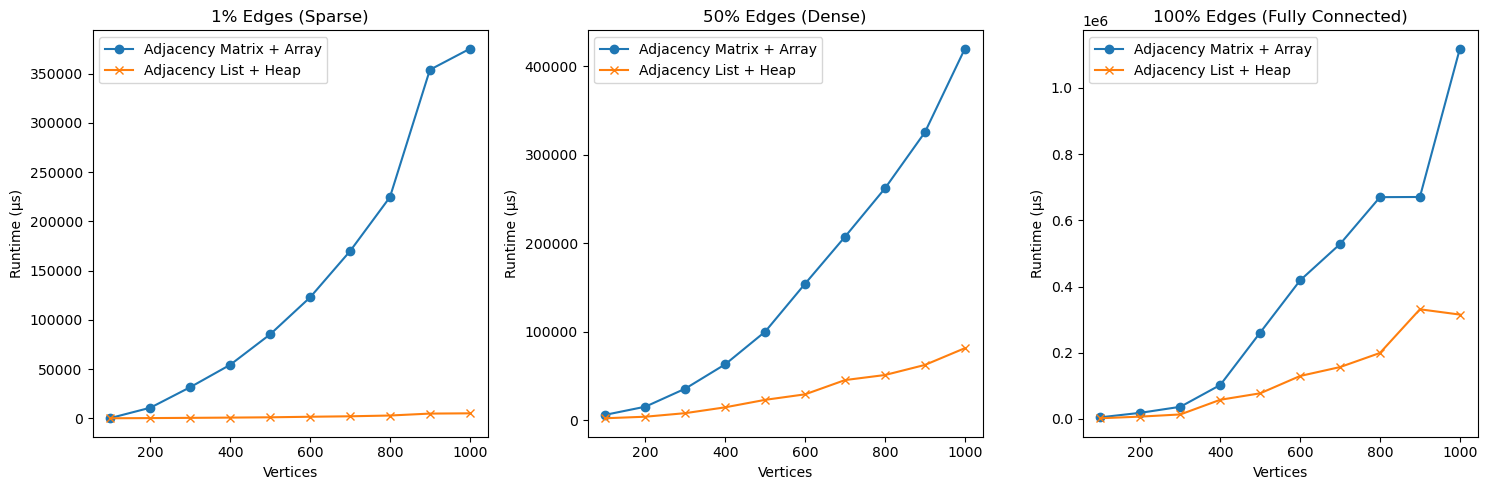

In [20]:
INF = float('inf')
random.seed(42)
np.random.seed(42)

def matrix_to_adj_list(matrix):
    n = len(matrix)
    adj = [[] for _ in range(n)]
    for u in range(n):
        for v, w in enumerate(matrix[u]):
            if v != u and w != 0 and w != INF:
                adj[u].append((v, w))
    return adj

def dijkstra_matrix_array(adj_matrix, s=0):
    n = adj_matrix.shape[0]
    dist = [INF] * n
    vis = [False] * n
    dist[s] = 0.0
    for _ in range(n):
        u = -1
        best = INF
        for i in range(n):
            if not vis[i] and dist[i] < best:
                best = dist[i]; u = i
        if u == -1:
            break
        vis[u] = True
        du = dist[u]
        for v in range(n):
            w = adj_matrix[u][v]
            if w != INF:
                nd = du + w
                if nd < dist[v]:
                    dist[v] = nd
    return dist

def dijkstra_adjlist_heap(adj_list, s=0):
    n = len(adj_list)
    dist = [INF] * n
    dist[s] = 0.0
    vis = [False] * n
    pq = [(0.0, s)]
    while pq:
        d, u = heapq.heappop(pq)
        if vis[u]:
            continue
        vis[u] = True
        for v, w in adj_list[u]:
            nd = d + w
            if nd < dist[v]:
                dist[v] = nd
                heapq.heappush(pq, (nd, v))
    return dist

def make_matrix(n, density):
    m = np.full((n, n), INF, dtype=float)
    np.fill_diagonal(m, 0.0)
    max_edges = n * (n - 1) // 2
    e = max(1, int(density * max_edges))
    pairs = random.sample([(u, v) for u in range(n) for v in range(u + 1, n)], e)
    for u, v in pairs:
        w = random.randint(1, 100)
        m[u, v] = w
        m[v, u] = w
    return m

def _time_once(f, *args):
    t0 = time.perf_counter()
    f(*args)
    return (time.perf_counter() - t0) * 1e6  # microseconds

densities = [("1% Edges (Sparse)", 0.01),
             ("50% Edges (Dense)", 0.50),
             ("100% Edges (Fully Connected)", 1.00)]
N_list = list(range(100, 1001, 100))
TRIALS = 2

rows = []
for name, p in densities:
    for n in N_list:
        M = make_matrix(n, p)
        AL = matrix_to_adj_list(M)
        tm = sum(_time_once(dijkstra_matrix_array, M, 0) for _ in range(TRIALS)) / TRIALS
        tl = sum(_time_once(dijkstra_adjlist_heap, AL, 0) for _ in range(TRIALS)) / TRIALS
        rows.append({"Density": name, "Vertices": n,
                     "Matrix+Array (µs)": tm,
                     "AdjList+Heap (µs)": tl,
                     "Speedup (MA/AL)": (tm / tl) if tl > 0 else float("inf")})

df = pd.DataFrame(rows)
display(df)

plt.figure(figsize=(15,5))
for i, (name, _) in enumerate(densities):
    sub = df[df["Density"] == name]
    plt.subplot(1, 3, i + 1)
    plt.plot(sub["Vertices"], sub["Matrix+Array (µs)"], "o-", label="Adjacency Matrix + Array")
    plt.plot(sub["Vertices"], sub["AdjList+Heap (µs)"], "x-", label="Adjacency List + Heap")
    plt.title(name)
    plt.xlabel("Vertices")
    plt.ylabel("Runtime (µs)")
    plt.legend()
plt.tight_layout()
plt.show()
